In [1]:
# TRABAJO HECHO POR:
# ARTURO BARONA
# JUAN CAMILO RODRÍGUEZ

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Definir las funciones de activación y entrenamiento
def linear_function(x):
    return x

def adaline_predict(X, weights):
    return linear_function(np.dot(X, weights[1:]) + 0*weights[0])

def adaline_train(X, y, learning_rate, epochs):
    weights = np.random.rand(X.shape[1] + 1)
    errors = []
    for _ in range(epochs):
        total_error = 0
        for xi, target in zip(X, y):
            output = adaline_predict(xi, weights)
            error = (target - output)**2
            total_error += abs(error)
            update = 2 * learning_rate * (target - output)
            weights[1:] += update * xi
            weights[0] += update
        errors.append(total_error)
    return weights, errors


In [3]:
# Definir los parámetros
A1 = 1.0  # Amplitud de x1
A2 = 1.0  # Amplitud de x2
A3 = 1.0  # Amplitud de x3
w1 = 2 * np.pi * 1  # Frecuencia angular para x1
w2 = 2 * np.pi * 2  # Frecuencia angular para x2
w3 = 2 * np.pi * 3  # Frecuencia angular para x3

# Preparar los datos de entrada y salida
n_samples = 5000
t = np.linspace(0, 12, n_samples)

# Definir las señales sinusoidales
x1 = A1 * np.sin(w1 * t)
x2 = A2 * np.sin(w2 * t)
x3 = A3 * np.sin(w3 * t)

# Combinar las señales
X = x1 + x2 + x3


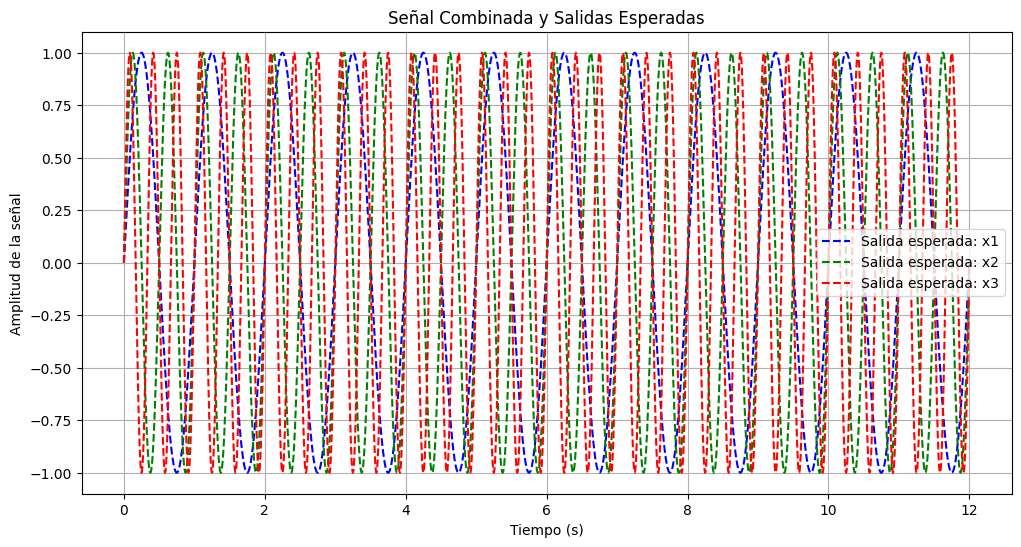

In [4]:
# Graficar la señal combinada y las salidas esperadas en una sola gráfica
plt.figure(figsize=(12, 6))
# plt.plot(t, X, label='Entrada con ruido', color='k')
plt.plot(t, x1, '--b', label='Salida esperada: x1')
plt.plot(t, x2, '--g', label='Salida esperada: x2')
plt.plot(t, x3, '--r', label='Salida esperada: x3')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud de la señal")
plt.title("Señal Combinada y Salidas Esperadas")
plt.legend()
plt.grid(True)
plt.show()


In [5]:
# Crear las entradas y la salida para ADALINE
delay = 15
noisy_signal = np.array([X[i:i+delay] for i in range(n_samples-delay)])
d = x1[delay:] 

# Entrenar el perceptrón
weights, errors = adaline_train(noisy_signal, d, 0.01, 200)
print("Pesos entrenados:", weights)
print("Errores:", errors)


Pesos entrenados: [42.77852878  8.91097384  5.21530146  1.64956094 -0.61606083 -2.81979349
 -4.3430342  -4.7977327  -5.08316057 -5.33601582 -4.08663873 -3.05664676
 -0.631695    1.61206079  5.36089915  8.78421916]
Errores: [1479.7019283894285, 1216.3735386791748, 1114.634921508833, 1024.3322707450843, 944.180369999644, 873.038425514093, 809.8938379284888, 753.8477975026939, 704.1024979078188, 659.9497867224667, 620.7610912029556, 585.9784760352622, 555.1067058768535, 527.7061997880306, 503.3867773379308, 481.8021074306913, 462.64478089225065, 445.641936730253, 430.55137985475744, 417.1581350375609, 405.27138809295127, 394.72177077024685, 385.35895073740346, 377.0494923743531, 369.67495794676984, 363.1302221500043, 357.3219760478478, 352.1673991247829, 347.5929805615381, 343.533472966333, 339.9309636783142, 336.7340504319584, 333.8971096557054, 331.37964699580886, 329.1457208258511, 327.1634305407108, 325.40446235519386, 323.8436861455418, 322.45879759818024, 321.23000057445955, 320.139

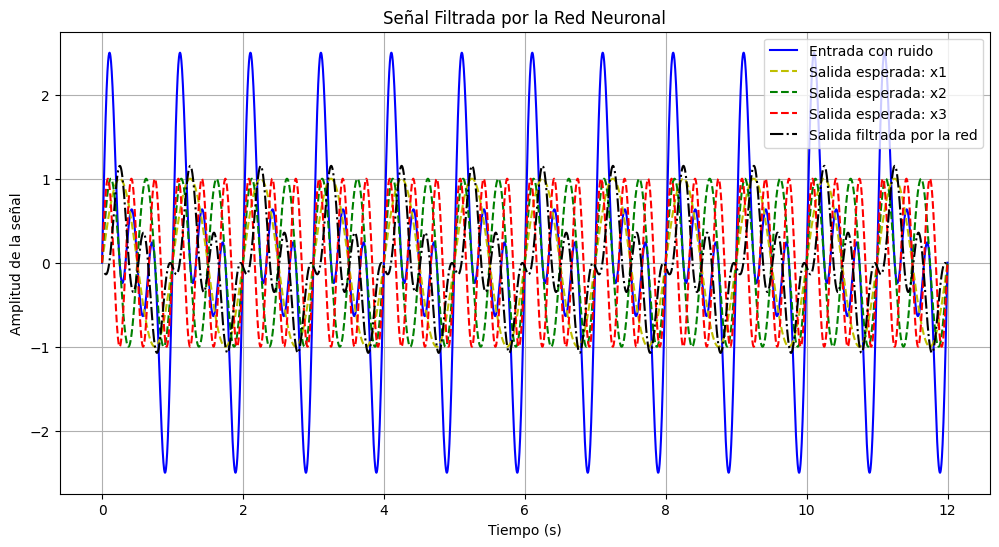

In [6]:
# Señal filtrada
prediction = np.zeros(noisy_signal.shape[0])
for i, xi in enumerate(noisy_signal):
    prediction[i] = adaline_predict(xi, weights)

# Mostrar la gráfica con la señal filtrada
plt.figure(figsize=(12, 6))
plt.plot(t, X, 'b', label='Entrada con ruido')
plt.plot(t, x1, '--y', label='Salida esperada: x1')
plt.plot(t, x2, '--g', label='Salida esperada: x2')
plt.plot(t, x3, '--r', label='Salida esperada: x3')
plt.plot(t[delay:], prediction, '-.k', label='Salida filtrada por la red')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud de la señal")
plt.title("Señal Filtrada por la Red Neuronal")
plt.legend()
plt.grid(True)
plt.show()


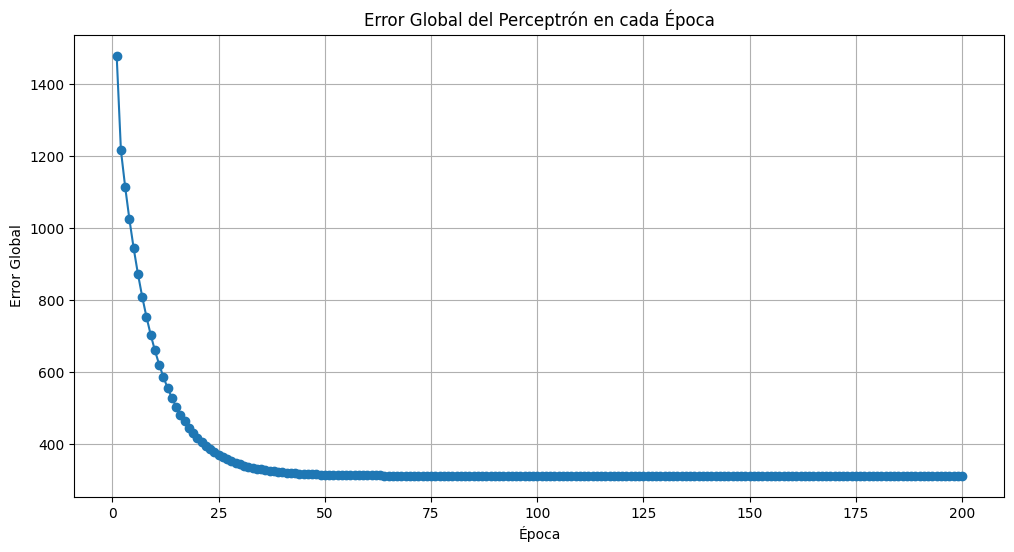

In [7]:
# Graficar el error global en cada época
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(errors) + 1), errors, marker='o')
plt.xlabel('Época')
plt.ylabel('Error Global')
plt.title('Error Global del Perceptrón en cada Época')
plt.grid(True)
plt.show()